In [1]:
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset
import pdb

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

california_housing_dataframe = pd.read_csv("data.txt", sep=",")


def preprocess_features(california_housing_dataframe):
    selected_features = california_housing_dataframe[["a", "b", "c", "re1", "re2", "x11", "x12", "x21", "x22"]]
    processed_features = selected_features.copy()
    # Create a synthetic feature.
    return processed_features

def preprocess_targets(california_housing_dataframe):
    output_targets = pd.DataFrame()
    # Scale the target to be in units of thousands of dollars.
    output_targets["re1"] = california_housing_dataframe["re1"]
    return output_targets

training_examples = preprocess_features(california_housing_dataframe.head(8000))
training_examples.describe()


,a,b,c,re1,re2,x11,x12,x21,x22
count,5578.0,5578.0,5578.0,5578.0,5578.0,5578.0,5578.0,5578.0,5578.0
mean,0.0,7.8,2.1,-20.6,-7.9,-4.9,-107746.5,-4.9,-107746.5
std,0.0,3.9,5.8,2.7,6.4,24.5,231468.0,24.5,231468.0
min,0.0,-4.7,-14.4,-36.2,-23.9,-436.4,-999907.0,-436.4,-999907.0
25%,0.0,4.6,-2.8,-20.8,-13.3,-0.2,-64303.0,-0.2,-64303.0
50%,0.0,8.4,1.6,-19.7,-7.8,-0.0,-4303.7,-0.0,-4303.7
75%,0.0,11.1,6.7,-19.1,-1.4,-0.0,-96.9,-0.0,-96.9
max,0.0,13.8,13.8,-16.5,10.2,0.0,-0.0,-0.0,-0.0


In [3]:
training_targets = preprocess_targets(california_housing_dataframe.head(8000))
training_targets.describe()

validation_examples = preprocess_features(california_housing_dataframe.tail(2000))
validation_targets = preprocess_targets(california_housing_dataframe.tail(2000))

print(validation_targets["re1"])

3578   -18.6
3579   -19.8
3580   -19.5
3581   -19.3
3582   -18.9
        ... 
5573   -19.6
5574   -18.5
5575   -21.1
5576   -19.1
5577   -20.2
Name: re1, Length: 2000, dtype: float64


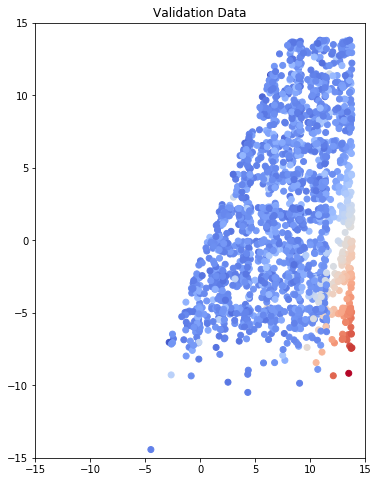

In [6]:


plt.figure(figsize=(13, 8))

ax = plt.subplot(1, 2, 1)
ax.set_title("Validation Data")

ax.set_autoscaley_on(False)
ax.set_ylim([-15, 15])
ax.set_autoscalex_on(False)
ax.set_xlim([-15, 15])
plt.scatter(validation_examples["b"],
            validation_examples["c"],
            cmap="coolwarm",
            c=validation_targets["re1"] / validation_targets["re1"].max())

# ax = plt.subplot(1,2,2)
# ax.set_title("Training Data")

# ax.set_autoscaley_on(False)
# ax.set_ylim([32, 43])
# ax.set_autoscalex_on(False)
# ax.set_xlim([-126, -112])
# plt.scatter(training_examples["b"],
#             training_examples["c"],
#             cmap="coolwarm",
#             c=training_targets["re1"] / training_targets["re1"].max())
_ = plt.plot()
